In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [6]:
m = 100
X = 6 * np.random.rand(m, 1) - 2.5
y = 3*X**2 + 1.5*X + 3.45 + 2*np.random.randn(m, 1)   

In [7]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    #plotting the train_data_error, val_data_error for each training iteration.
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 


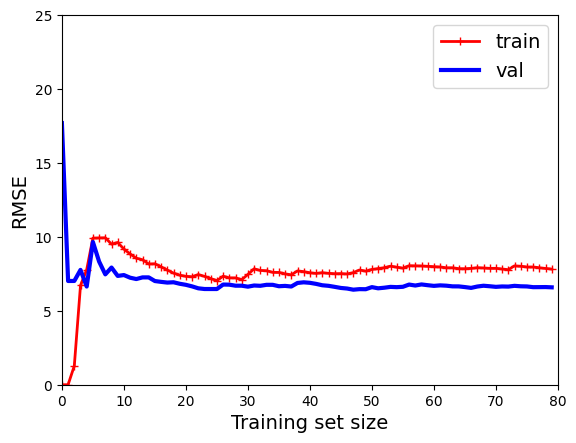

In [8]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 25])
plt.show()

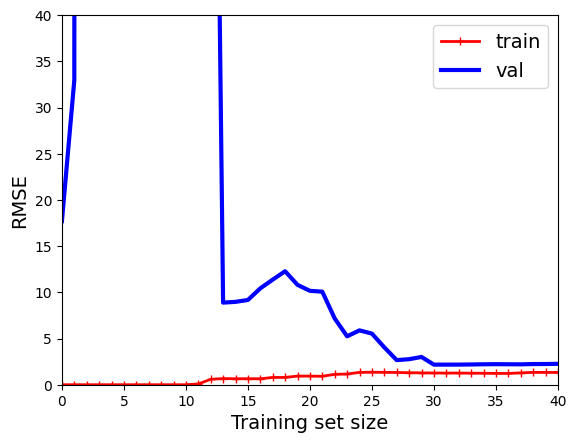

In [32]:
poly_reg = Pipeline([('poly_features', PolynomialFeatures(degree=10, include_bias=False)), ('lin_reg_model', LinearRegression())])
plot_learning_curves(poly_reg, X, y)
plt.axis([0, 40, 0, 40])
plt.show()

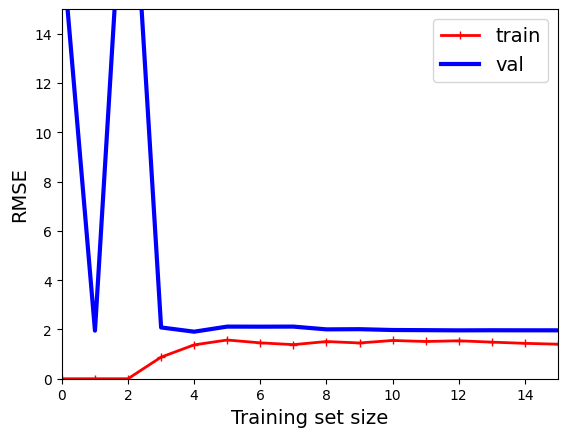

In [25]:
poly_reg = Pipeline([('poly_features', PolynomialFeatures(degree=2, include_bias=False)), ('lin_reg_model', LinearRegression())])
plot_learning_curves(poly_reg, X, y)
plt.axis([0, 15, 0, 15])
plt.show()

In [22]:
#perfect model as my degree was 2

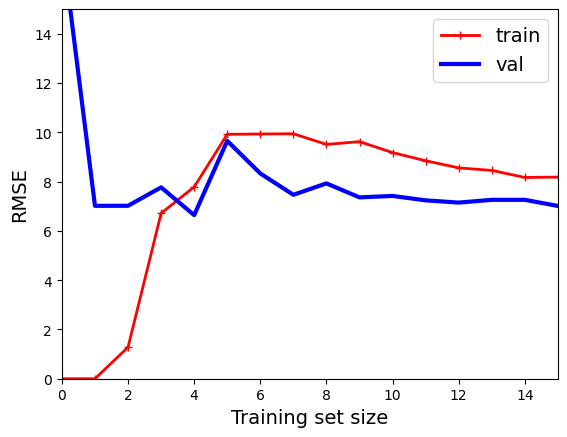

In [27]:
poly_reg = Pipeline([('poly_features', PolynomialFeatures(degree=1, include_bias=False)), ('lin_reg_model', LinearRegression())])
plot_learning_curves(poly_reg, X, y)
plt.axis([0, 15, 0, 15])
plt.show()